In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

### Make data

In [2]:
numcat = 2
categories = ['healthy', 'disease']

In [3]:
df_h = pd.read_csv('health_data.csv')
print(df_h.head())

train_per = 0.7 #train test split
#randomize indces, take the first 80% of the indeces and last 20 percent as test
indices = np.random.permutation(df_h.shape[0])
train_ind, test_ind = indices[:int(train_per*df_h.shape[0])], indices[int(train_per*df_h.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df_h.loc[train_ind, :], df_h.loc[test_ind, :]
train_df, test_df = train_df.reset_index(drop = True), test_df.reset_index(drop = True)
# train_df.drop('index')

# Data in numpy arrays (also separating train data by classes)
X_train = train_df.drop('category', axis = 1).to_numpy()
y_train = train_df.drop(['age', 'restbps', 'chol'], axis = 1).to_numpy().reshape((X_train.shape[0],))

# X_train_0, X_train_1 = train_df.loc[train_df['category'] == 0].drop('category', axis = 1).to_numpy(),train_df.loc[train_df['category'] == 1].drop('category', axis = 1).to_numpy()
X_test, y_test = test_df.drop('category', axis = 1).to_numpy(), test_df['category'].to_numpy().reshape((-1, ))
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0
(211, 3) (211,) (489, 3) (489,)


### PCA to reduce to 2 dimensions

In [106]:
indices = np.random.permutation(df_h.shape[0])
df_h = df_h.loc[indices]
X = df_h.drop('category', axis = 1).to_numpy()
y = df_h.drop(['age', 'restbps', 'chol'], axis = 1).to_numpy().reshape((X.shape[0],))

In [107]:
def scatter(x, colors):
    '''Libraries use for this function ONLY'''
    import matplotlib.patheffects as PathEffects
#     %matplotlib inline

    import seaborn as sns
    '''------------------------------------'''
    
#     sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
                    rc={"lines.linewidth": 2.5})
    
    '''----------------------------------------'''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print('Number of unique classes are = {}'.format(num_classes))
    palette = np.array(sns.color_palette("hls", num_classes))
#     print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')
    # add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):

        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, categories[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [108]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.11821770668029785 seconds


In [109]:
pca_df = pd.DataFrame(columns = ['pca1','pca2'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.9003689 0.088414 ]


Number of unique classes are = 2


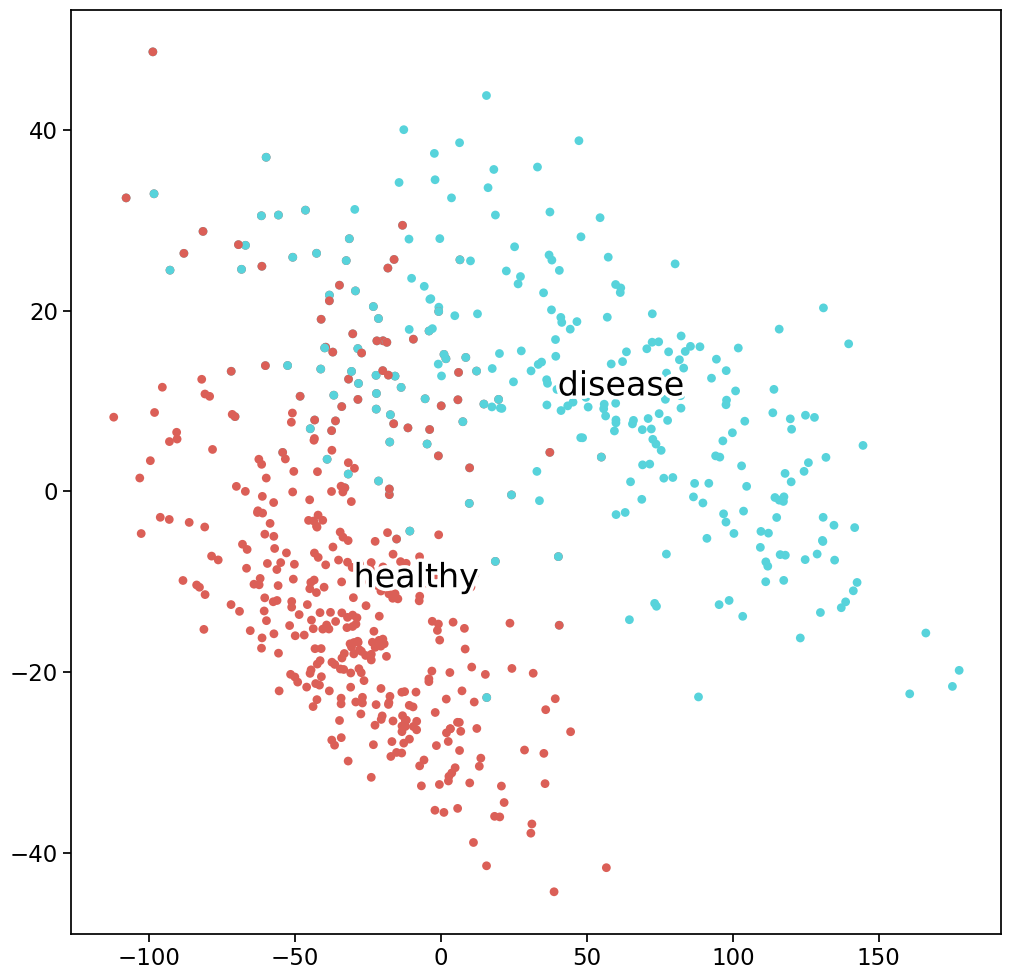

In [110]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fig, _,_,_ = scatter(top_two_comp.values,y) # Visualizing the PCA output

In [141]:
import matplotlib.pyplot as plt

In [112]:
X_pca = top_two_comp.values
#randomize indices


In [113]:
##Now we have pca output data Xpca and y is same as before

In [114]:
X_train = X_pca[0:int(0.7*X_pca.shape[0])]
y_train = y[0:int(0.7*X_pca.shape[0])]
X_test = X_pca[int(0.7*X_pca.shape[0]):]
y_test = y[int(0.7*X_pca.shape[0]):]

In [115]:
print(X_train.shape)
print(y_train.shape)

(489, 2)
(489,)


### RBF Kernel

In [116]:
#Training
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
#testing
y_pred_test = clf.predict(X_test)
print(y_pred_test)

[1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1
 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1
 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0]


In [118]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8571    0.9231    0.8889       117
           1     0.8941    0.8085    0.8492        94

    accuracy                         0.8720       211
   macro avg     0.8756    0.8658    0.8690       211
weighted avg     0.8736    0.8720    0.8712       211



### Grid search over C and gamma
for each C plotting error formultiple gammas

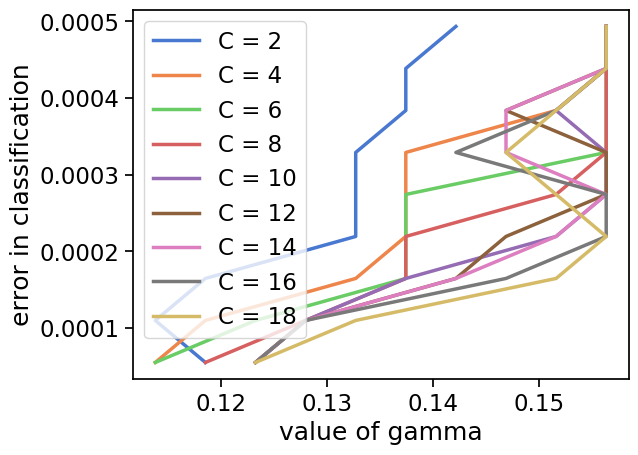

In [149]:
rangeC = [2*i for i in range(1, 10)]
range_g = [i/5 for i in range(1, 10)]*1/(X_train.shape[1]*X_train.var())# the multiplied value is the default value of gamma
# errors = []
bestC = 0
bestgamma = 0
besterror = 0
maxerror = 0 
minerror = 100
for C in rangeC:
    errors = []
    for gamma in range_g:

        #Training
        clf = svm.SVC(kernel='rbf', C = C, gamma = gamma)
        clf.fit(X_train, y_train)
        
        #testing
        y_pred_test = clf.predict(X_test)
        error = 1-(y_pred_test==y_test).mean()
        errors.append(error)
#         errors.append(error)
        if(besterror<=error):
            besterror = error
            bestC=C
            bestgamma = gamma
        if(error>maxerror):
            maxerror = error
        if(error<minerror):
            minerror = error
#         print(error)
    plt.plot(errors, range_g, label = 'C = {}'.format(np.around(C)))
            
# plt.ylim(minerror, maxerror)

plt.xlabel('value of gamma')
plt.ylabel('error in classification')

plt.legend()
plt.show()

In [150]:
CRBF, gammaRBF = bestC, bestgamma
print(CRBF, gammaRBF)

18 0.0004933752132474921


### Linear Kernel

In [151]:
#Training
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [152]:
#testing
y_pred_test = clf.predict(X_test)

In [153]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8739    0.8889    0.8814       117
           1     0.8587    0.8404    0.8495        94

    accuracy                         0.8673       211
   macro avg     0.8663    0.8647    0.8654       211
weighted avg     0.8672    0.8673    0.8671       211



### Cross Validation
To find optimal value of C 

In [159]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='linear', C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())
#     if

[0.14506627393225335, 0.14506627393225335, 0.14506627393225335, 0.14506627393225335, 0.14710709025878388]


Text(0, 0.5, 'error in classification')

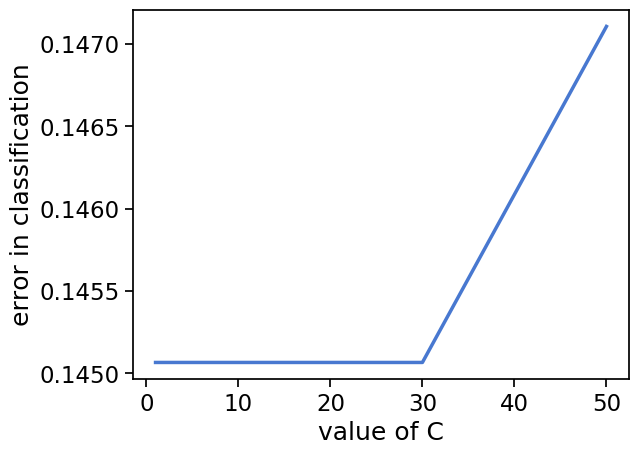

In [160]:
print(error)
plt.plot(rangeC, error)
plt.xlabel('value of C')
plt.ylabel('error in classification')

In [162]:
clinear = 15

### Polynomial Kernel

### Degree 2

In [163]:
#Training
clf = svm.SVC(kernel='poly', degree = 2, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [164]:
#testing
y_pred_test = clf.predict(X_test)

In [165]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.6136    0.9231    0.7372       117
           1     0.7429    0.2766    0.4031        94

    accuracy                         0.6351       211
   macro avg     0.6782    0.5998    0.5702       211
weighted avg     0.6712    0.6351    0.5884       211



### Cross Validation
To find optimal value of C 

In [166]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 2, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.3190826846202399, 0.3190826846202399, 0.3190826846202399, 0.3190826846202399, 0.3190826846202399]


Text(0, 0.5, 'error in classification')

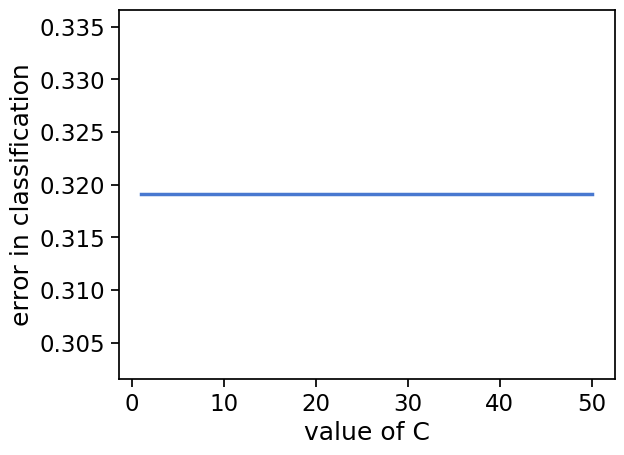

In [167]:
print(error)
plt.plot(rangeC, error)
plt.xlabel('value of C')
plt.ylabel('error in classification')

In [168]:
cpoly2 = 1

### Degree 3

In [169]:
#Training
clf = svm.SVC(kernel='poly', degree = 3, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [170]:
#testing
y_pred_test = clf.predict(X_test)

In [171]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.7582    0.9915    0.8593       117
           1     0.9828    0.6064    0.7500        94

    accuracy                         0.8199       211
   macro avg     0.8705    0.7989    0.8046       211
weighted avg     0.8582    0.8199    0.8106       211



### Cross Validation
To find optimal value of C 

In [177]:
error = []
rangeC = [1, 5, 10, 30, 50, 100, 1000]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 3, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.18407321691563217, 0.17590995160950984, 0.16566379128971176, 0.1656427519461392, 0.15949926362297495, 0.15745844729644443, 0.1676625289290975]


Text(0, 0.5, 'error in classification')

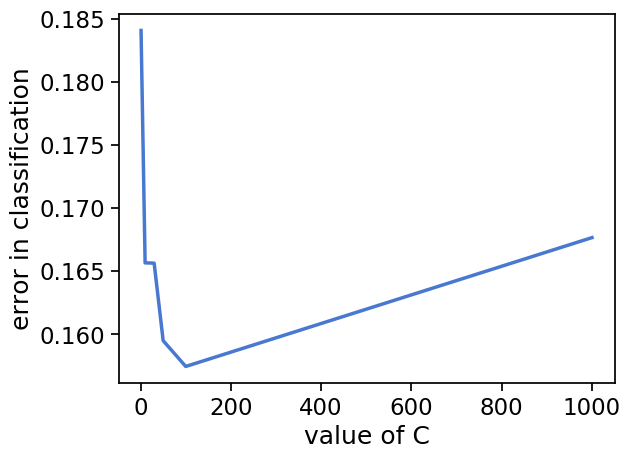

In [178]:
print(error)
plt.plot(rangeC, error)

plt.xlabel('value of C')
plt.ylabel('error in classification')

In [180]:
cpoly3 = 100

### Degree 4

In [181]:
#Training
clf = svm.SVC(kernel='poly', degree = 4, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [182]:
#testing
y_pred_test = clf.predict(X_test)

In [183]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.6158    0.9316    0.7415       117
           1     0.7647    0.2766    0.4062        94

    accuracy                         0.6398       211
   macro avg     0.6903    0.6041    0.5739       211
weighted avg     0.6821    0.6398    0.5921       211



### Cross Validation
To find optimal value of C 

In [184]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 4, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.32522617294340417, 0.32522617294340417, 0.32728802861350725, 0.32728802861350725, 0.32728802861350725]


Text(0, 0.5, 'error in classification')

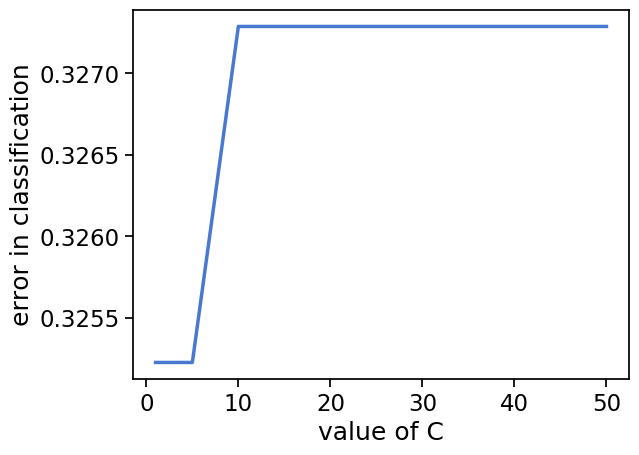

In [185]:
print(error)
plt.plot(rangeC, error)

plt.xlabel('value of C')
plt.ylabel('error in classification')

#lowest error achieved at c=1

In [186]:
cpoly4 = 1

# Decision boundaries

KeyboardInterrupt: 

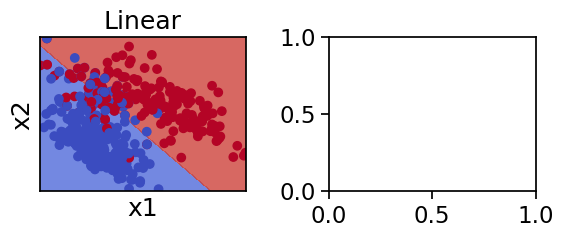

In [190]:
# approach - we make a grid and classify all points
# step size in the grid
h = .02

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=clinear).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=gammaRBF, C=CRBF).fit(X_train, y_train)
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear',
          'RBF',
         ]


for i, clf in enumerate((svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
# approach - we make a grid and classify all points
# step size in the grid
h = .02

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=clinear).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=gammaRBF, C=CRBF).fit(X_train, y_train)
poly2_svc = svm.SVC(kernel='poly', degree=2, C=cpoly2).fit(X_train, y_train)
poly3_svc = svm.SVC(kernel='poly', degree=3, C=cpoly3).fit(X_train, y_train)
poly4_svc = svm.SVC(kernel='poly', degree=4, C=cpoly4).fit(X_train, y_train)

# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear',
          'RBF',
          'Poly.Deg = 2',
          'Poly.Deg = 3',
          'Poly.Deg = 4'
         ]


for i, clf in enumerate((svc, rbf_svc, poly2_svc, poly3_svc, poly4_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()